In [49]:
import os
import sys
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import json
from __future__ import division, print_function

import scipy.stats


import pylab as pl
import seaborn
%pylab inline

np.seed = 999

Populating the interactive namespace from numpy and matplotlib


In [3]:
'''
source: https://data.cityofnewyork.us/Housing-Development/DOF-Condominium-Comparable-Rental-Income-Manhattan/956m-xy24

The Department of Finance (DOF) is required by NY State law to value 
condominiums or cooperatives as if they were residential rental 
apartment buildings. DOF uses income information from rental 
properties similar in physical features and location to the condominiums 
or cooperatives. DOF applies this income data to the condominium or 
cooperative and determine its value in the same way DOF values rental 
apartment buildings. 
Update Frequency: Annually
'''

data_housing = pd.read_csv("DOF__Condominium_Comparable_Rental_Income__Manhattan___FY_2008_2009.csv")

In [7]:
data_small = data_housing[["MANHATTAN CONDOMINIUM PROPERTY Total Units", \
                           "MANHATTAN CONDOMINIUM PROPERTY Gross SqFt", \
                          "MANHATTAN CONDOMINIUM PROPERTY Est. Gross Income", \
                          "MANHATTAN CONDOMINIUM PROPERTY Gross Income per SqFt"]]
data_small.columns = ['total_units', 'gross_area', 'gross_income', 'gross_income_per_area'] 
data_small.head()

,total_units,gross_area,gross_income,gross_income_per_area
0,42,36500,994000,27.2
1,500,554174,17000000,30.7
2,282,249076,9500000,38.1
3,239,219495,7600000,34.6
4,133,139719,4830000,34.6


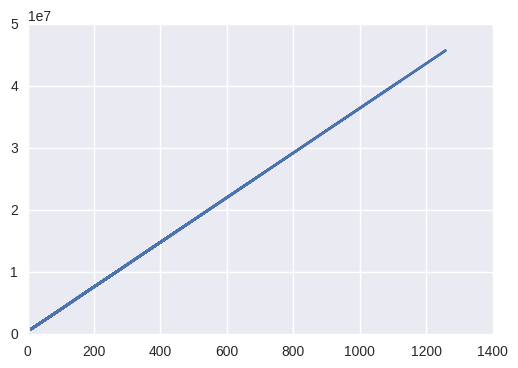

In [53]:
linmodel_total_units = smf.ols(formula = 'gross_income ~ total_units',
                            data = data_small).fit()

linmodel_total_units.summary()
pars = linmodel_total_units.params
pl.plot(data_small.total_units, pars[0] + pars[1]*data_small.total_units)

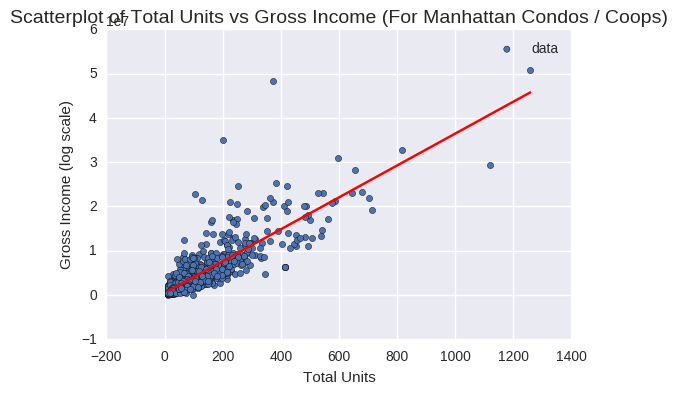

In [67]:
ax = data_small.plot(x = 'total_units', y = 'gross_income', kind = 'scatter', label='data')

ax.set_xlabel("Total Units")
ax.set_ylabel("Gross Income (log scale)")
pl.title('Scatterplot of Total Units vs Gross Income (For Manhattan Condos / Coops)', fontsize=14)

total_units_plot_range = np.linspace(data_small.total_units.min(), data_small.total_units.max(), 100)
tmp = pd.DataFrame()
tmp['total_units'] = total_units_plot_range

gross_income_predicted = linmodel_total_units.predict(tmp)

ax.plot(total_units_plot_range, gross_income_predicted, c='r', label='model line')

In [62]:
linmodel_area = smf.ols(formula = 'gross_income_per_area ~ total_units',
                            data = data_small).fit()

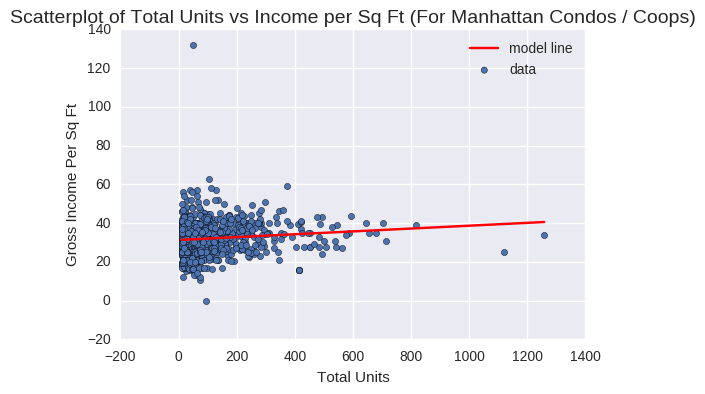

In [69]:
ax = data_small.plot(x = 'total_units', y = 'gross_income_per_area', kind = 'scatter', label='data')

ax.set_xlabel("Total Units")
ax.set_ylabel("Gross Income Per Sq Ft")
pl.title('Scatterplot of Total Units vs Income per Sq Ft (For Manhattan Condos / Coops)', fontsize=14)

area_predicted = linmodel_area.predict(tmp)

ax.plot(total_units_plot_range, area_predicted, c='r', label='model line')
ax.legend()